In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib
import json
from xgboost import XGBoostRegressior

In [18]:
def retreave_data(DS,DE):

  """Extract data using wikimedia api"""

  with urllib.request.urlopen(f'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia/all-access/all-agents/daily/{DS}/{DE}') as url:
    data = json.loads(url.read().decode())

  data = pd.DataFrame(data['items'])[['timestamp','views']]
  data.timestamp = data.timestamp.apply(lambda x:x[0:-2])
  data.timestamp = pd.DatetimeIndex(data.timestamp)
  data.set_index('timestamp',inplace=True)
  data.index.name = None

  data['views'] = data['views']/1e6

  return data

In [21]:
data = retreave_data('2018010100','2022033100')

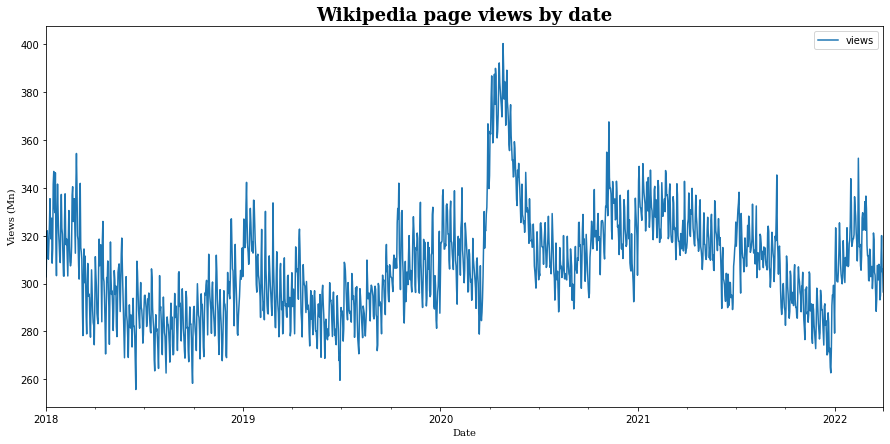

In [25]:
ax = data.plot(figsize=(15,7))
plt.xlabel("Date",fontfamily='serif')
plt.ylabel("Views (Mn)",fontfamily='serif')
plt.title("Wikipedia page views by date", fontsize=18,fontweight='semibold',fontfamily='serif')
plt.show()